# Entrega 1 - Análise Exploratória

Integrantes:
Rafael Louvain,
Zander do Valle,
Gilson Gabriel,
Felipe Dilly,
Frederick Campbell

A abordagem utilizada será partir de uma EDA razoavelmente livre por meio da qual espera-se que alguns resultados preliminares possam sugerir um determinado subconjunto de variáveis mais interligadas para serem conectadas por um determinado método, indicando ou fortalecendo uma tese que já se imaginaria ser razoável para o contexto de aplicação do dataset.

Em termos mais práticos, serão adotadas algumas variáveis como alvo e a partir de análise de limpeza centrada no alvo será compreendida como se manifestam as relações entre as variáveis.

Para isso, as etapas de limpezas serão muito relevantes e possibilitará que possamos extrair indícios de quais teses sustentar e quais teses abandonar, bem como de que maneira analiticamente as variáveis se relacionam.

In [253]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np

In [254]:
path = 'Moto_HW_DATA_hashed.csv'

In [255]:
dataset = pd.read_csv(path)
dataset.head()

,barcode_hashed,age_days,full_cap_min,pct_lvl_max,min_dchrg_fcc,dchrg_diff,EBL,total_chrg_cnt,cnt_USB_chrg,shtdn_total,...,ratio_4G_ratio,ratio_5G_ratio,wifi_hrs_ratio,wifi_connections_ratio,mobile_rx_MB_ratio,mobile_tx_MB_ratio,son_hrs_ratio,primary_mem_free_MB_ratio,bt_conns_ratio,CRASH_total_ratio
0,b926676dccc67406700c4c57cf055b3df237fc0ab286f6...,1516,3644678.5,94.75,0.0,125.25,14.5,3.0,0.00,0.75,...,0.9969,0.0,0.9118,1.000,1.9149,1.2500,0.8889,0.7617,0.1111,1.5357
1,7a2e95793e69ff2704030353bf27fc1ad13916d0370a25...,309,4744.0,96.75,5000.0,74.25,17.5,4.0,0.00,0.00,...,1.0135,0.0,0.9574,2.625,7.6545,13.6667,1.0000,1.2185,0.5000,1.0000
2,938897a9982050704df677787e41581a8cc9335d19b735...,1186,-1.0,60.00,5000.0,14.00,207.0,1.5,0.00,0.00,...,0.0000,0.0,0.4357,0.750,0.0000,0.0000,0.0000,9.8087,0.0000,1.0000
3,6e878b24ff6ff1f6ffe4dc86f6095608800e1fce9a9c4b...,135,-1.0,90.75,-1.0,54.00,39.5,1.5,0.25,0.50,...,1.0509,0.0,1.0000,0.000,0.0000,0.0000,1.0000,1.0732,0.0000,1.3333
4,37219dd65adebf813d20af03c21bb6f1aa5b72815d964a...,640,-1.0,97.00,5000.0,32.00,62.0,2.0,0.00,1.00,...,0.0000,0.0,1.0000,0.000,0.0000,0.0000,1.0000,1.0000,0.0000,1.0000


In [256]:
dataset.drop(labels = ['barcode_hashed', 'EBL', 'EBL_ratio'], axis = 1, inplace = True)

In [257]:
row, col = dataset.shape

print(f'Dataset com {row} linhas e {col} colunas.')

Dataset com 21063 linhas e 51 colunas.


In [258]:
dataset.describe() # fornece informações importantes sobre a amostra, como variância e média, para entender possíveis outliers.

,age_days,full_cap_min,pct_lvl_max,min_dchrg_fcc,dchrg_diff,total_chrg_cnt,cnt_USB_chrg,shtdn_total,btlow_total,call_drop_sum,...,ratio_4G_ratio,ratio_5G_ratio,wifi_hrs_ratio,wifi_connections_ratio,mobile_rx_MB_ratio,mobile_tx_MB_ratio,son_hrs_ratio,primary_mem_free_MB_ratio,bt_conns_ratio,CRASH_total_ratio
count,21063.000000,2.106300e+04,21063.000000,2.106300e+04,21063.000000,21063.000000,21063.000000,21063.000000,21063.000000,21063.000000,...,21063.000000,21063.000000,21063.000000,21063.000000,21063.000000,21063.000000,21063.00000,21063.000000,21063.000000,21063.000000
mean,891.115226,3.331318e+05,90.010242,1.097094e+05,71.769253,7.128694,1.192710,0.558499,23.399789,0.049488,...,1.511138,0.070326,1.037570,0.566358,1.122205,0.586365,0.98595,1.446740,0.337698,1.059382
std,521.096493,1.105046e+06,9.909344,7.113471e+05,37.993755,13.017785,4.928158,0.679675,780.861824,0.191071,...,69.890095,7.744133,4.483117,0.772146,13.194708,1.840541,0.49110,23.158995,1.390651,3.603018
min,45.000000,-1.000000e+00,0.000000,-1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,452.000000,-1.000000e+00,85.500000,-1.000000e+00,45.250000,2.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.90910,1.000000,0.000000,0.666700
50%,859.000000,-1.000000e+00,93.000000,4.000000e+03,67.000000,3.500000,0.000000,0.500000,1.250000,0.000000,...,0.988300,0.000000,1.000000,0.400000,0.000000,0.000000,1.00000,1.002600,0.000000,1.000000
75%,1294.000000,4.869875e+03,97.500000,5.000000e+03,92.000000,7.000000,0.750000,1.000000,2.250000,0.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.07690,1.088500,0.000000,1.000000
max,2284.000000,5.081000e+06,100.000000,5.029000e+06,721.000000,347.500000,277.000000,13.000000,107014.000000,8.000000,...,9999.500000,1123.000000,641.500000,36.000000,1433.000000,124.000000,18.00000,3196.000000,133.000000,353.600000


In [259]:
cols_null_sum = {}
for col in dataset.columns:
    if dataset[col].isnull().sum() > 0:
        cols_null_sum[col] = f'Porcentagem de nulls no dataset : {100*(dataset[col].isnull().sum()/dataset.shape[0]).round(4)}%' # saber quais são as colunas com valores null e sua quantidade.

for col in cols_null_sum:
    print(f'{col} => {cols_null_sum[col]}')

calls_tot => Porcentagem de nulls no dataset : 47.31%
msgs_tot => Porcentagem de nulls no dataset : 45.94%
pics_tot => Porcentagem de nulls no dataset : 45.540000000000006%
primary_mem_free_MB => Porcentagem de nulls no dataset : 0.04%


array([[<Axes: title={'center': 'calls_tot'}>,
        <Axes: title={'center': 'msgs_tot'}>],
       [<Axes: title={'center': 'pics_tot'}>,
        <Axes: title={'center': 'primary_mem_free_MB'}>]], dtype=object)

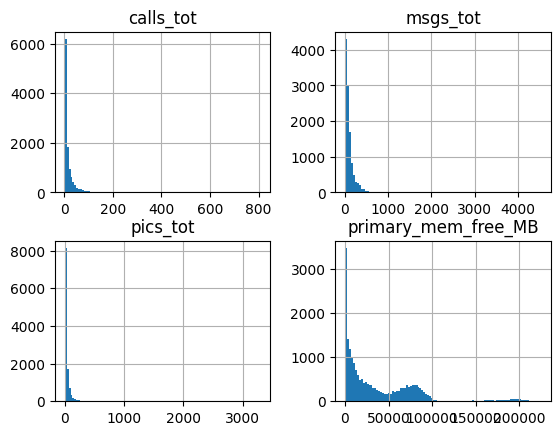

In [260]:
dataset[cols_null_sum.keys()].hist(bins = 100)

Quase metade dos valores nas colunas calls_tot, msgs_tot e pics_tot são vazios. Uma estratégia de imputar valores poderia distorcer a amostra. Nesse caso, vamos dropar essas colunas.

 Uma porcentagem muito baixa de null está presente em primary_mem_free_MEM. Poderiamos imputar valores ou até mesmo deletar essas linhas, visto serem muito poucas e provavelmente não farão diferença. Observando os histogramas acima, pode-se perceber que há outliers nessa coluna. Utilizar médias como valor de imputação pode ser ruim, pois ele é mais sensível a outliers. Nesse caso, também, observe que há um pico bem grande em 0. Isso pode também ser um problema de coleta de dados e se utilizássemos o método 'most_frequency', poderia distorcer também. Utilizamos então a mediana como valor a ser imputado.



In [261]:
imputer = SimpleImputer(strategy = 'median')

dataset.drop(labels = ['calls_tot', 'msgs_tot', 'pics_tot'], axis = 1, inplace = True)
df = pd.DataFrame(imputer.fit_transform(dataset, dataset.columns), columns = dataset.columns)



Verificação da coluna "primary_mem_free_MB":

array([[<Axes: title={'center': 'primary_mem_free_MB'}>]], dtype=object)

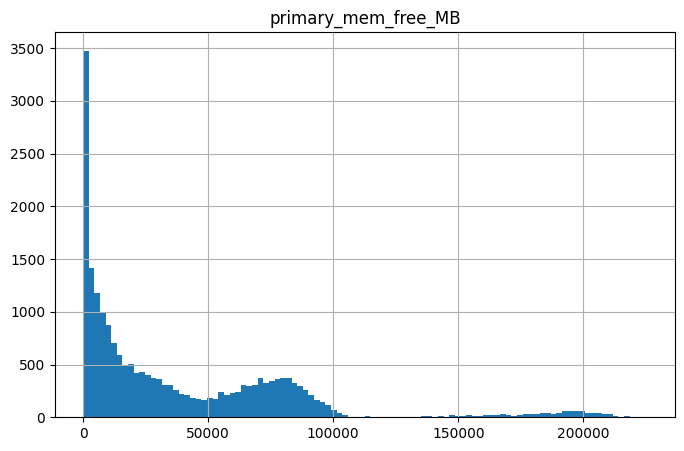

In [262]:
df[['primary_mem_free_MB']].hist(bins=100, figsize=(8, 5))

#### A matriz de correlação pode ajudar a encontrar relações lineares entre duas variáveis. Isso é uma boa ideia, quando se quer reduzir a dimensão do dataset, aglutinando algumas colunas em uma só.

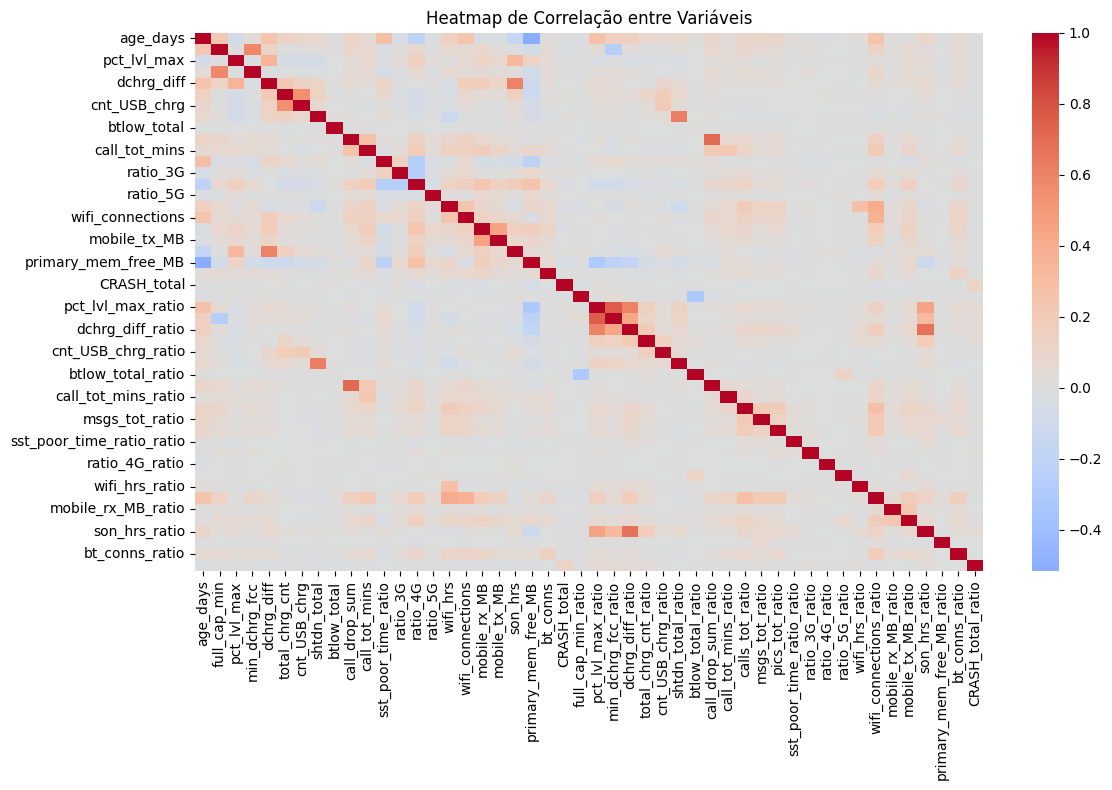

In [263]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Heatmap de Correlação entre Variáveis')
plt.tight_layout()
plt.show()

# Análise das variáveis "Crash"

##### Para entender melhor sobre as falhas, temos que investigar as labels referentes a esse fenômeno: Crash_total e Crash_total_ratio

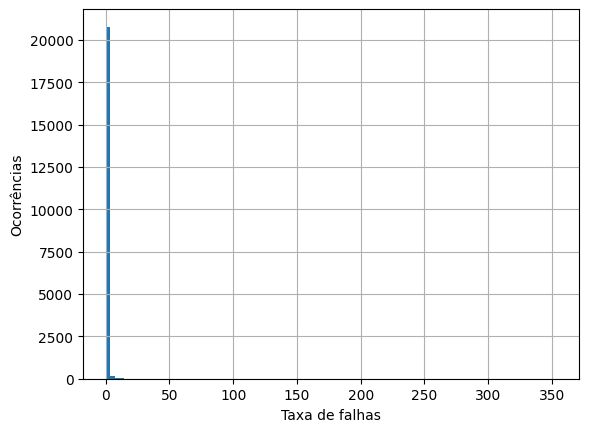

In [264]:
plt.hist(df['CRASH_total_ratio'], bins = 100)
plt.grid()
plt.xlabel("Taxa de falhas")
plt.ylabel("Ocorrências")
plt.show()

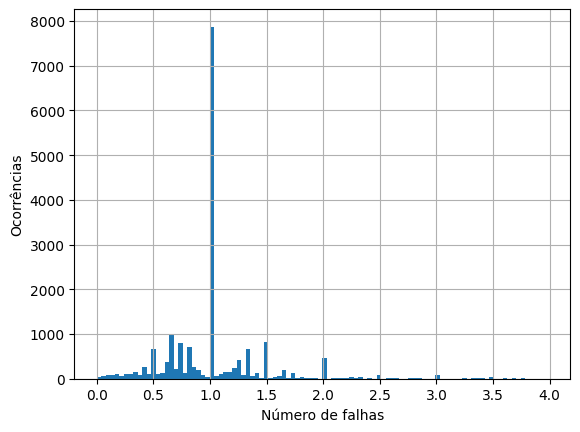

In [265]:
df = df.loc[(df['CRASH_total_ratio'] < 4) & (df['CRASH_total_ratio'] > 0) ] # eliminando possíveis outliers

plt.hist(df['CRASH_total_ratio'], bins = 100)
plt.grid()
plt.xlabel("Número de falhas")
plt.ylabel("Ocorrências")
plt.show()

In [266]:
df.shape

(18209, 48)

#### A partir desse histograma, é possível perceber que a taxa de falhas permanece inalterada durantes os meses de observação, para a maior parte das observações. dado que há um pico volumoso em 1, muito maior que qualquer outro caso. Também é possível entender que há uma tendência



In [267]:
def class_falhas(val):

    if val < 1:
        return 0.5
    elif val > 1:
        return 1.5
    else:
        return val

df['CRASH_total_ratio'] = df['CRASH_total_ratio'].map(class_falhas)

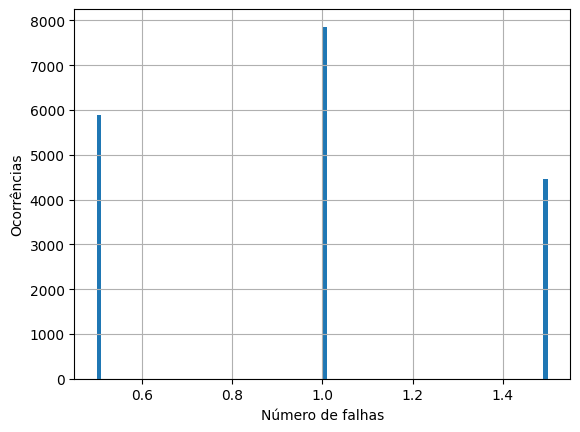

In [268]:
plt.hist(df['CRASH_total_ratio'], bins = 100)
plt.grid()
plt.xlabel("Número de falhas")
plt.ylabel("Ocorrências")
plt.show()

### Avaliando agora o Crash_total

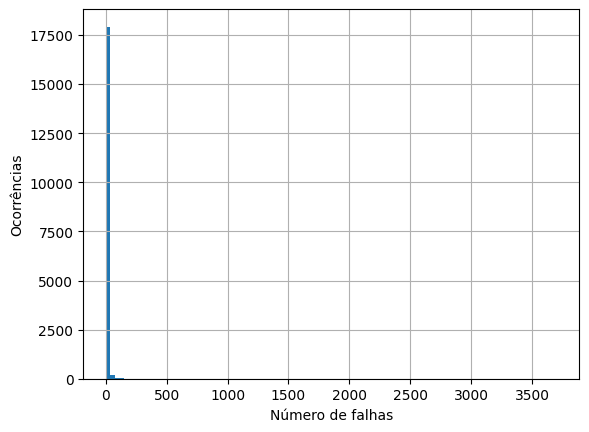

In [269]:
plt.hist(df['CRASH_total'], bins = 100)
plt.grid()
plt.xlabel("Número de falhas")
plt.ylabel("Ocorrências")
plt.show()

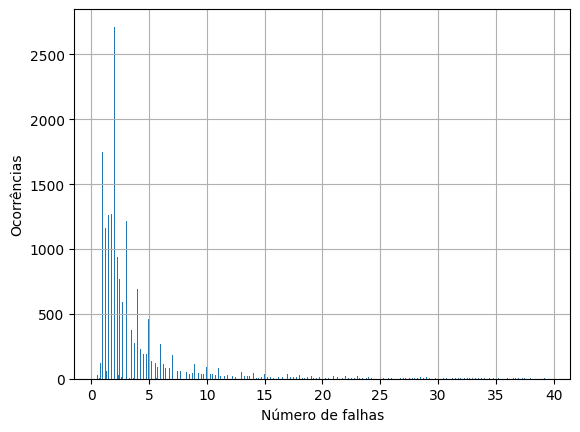

In [270]:
# eliminando outliers

df = df.loc[(df['CRASH_total'] < 40) & (df['CRASH_total'] > 0) ]

plt.hist(df['CRASH_total'], bins = 500)
plt.grid()
plt.xlabel("Número de falhas")
plt.ylabel("Ocorrências")
plt.show()

In [271]:
df['CRASH_total'] = df['CRASH_total'].map(lambda x: int(x))

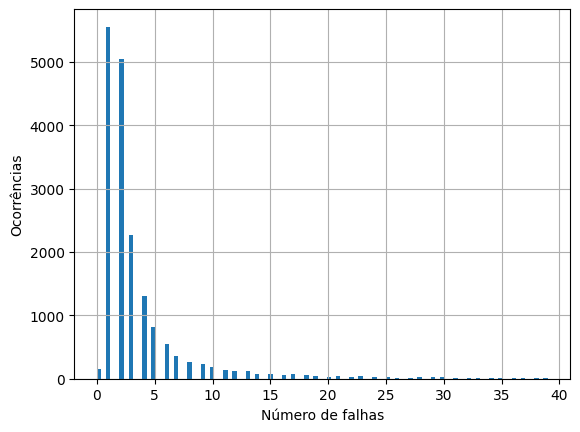

In [272]:
plt.hist(df['CRASH_total'], bins = 100)
plt.grid()
plt.xlabel("Número de falhas")
plt.ylabel("Ocorrências")
plt.show()

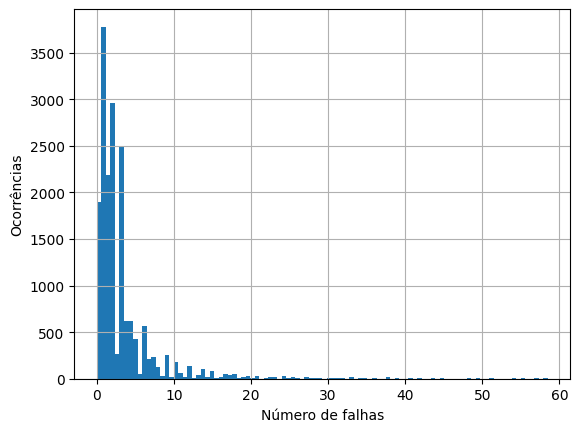

In [273]:
df['test'] = df['CRASH_total']*df['CRASH_total_ratio']

plt.hist(df['test'], bins = 100)
plt.grid()
plt.xlabel("Número de falhas")
plt.ylabel("Ocorrências")
plt.show()

Por fim, iremos buscar entender de que modo a escolha da variável alvo, realizando os filtros escolhidos, pressupõe correlação entre as variáveis do dataset. Para isso, será utilizado tanto nesse quanto nos demais casos a análise conjunta da matriz de covariância com a análise e explicitação dos pares que apresentaram correlação acima de um valor arbitrado.

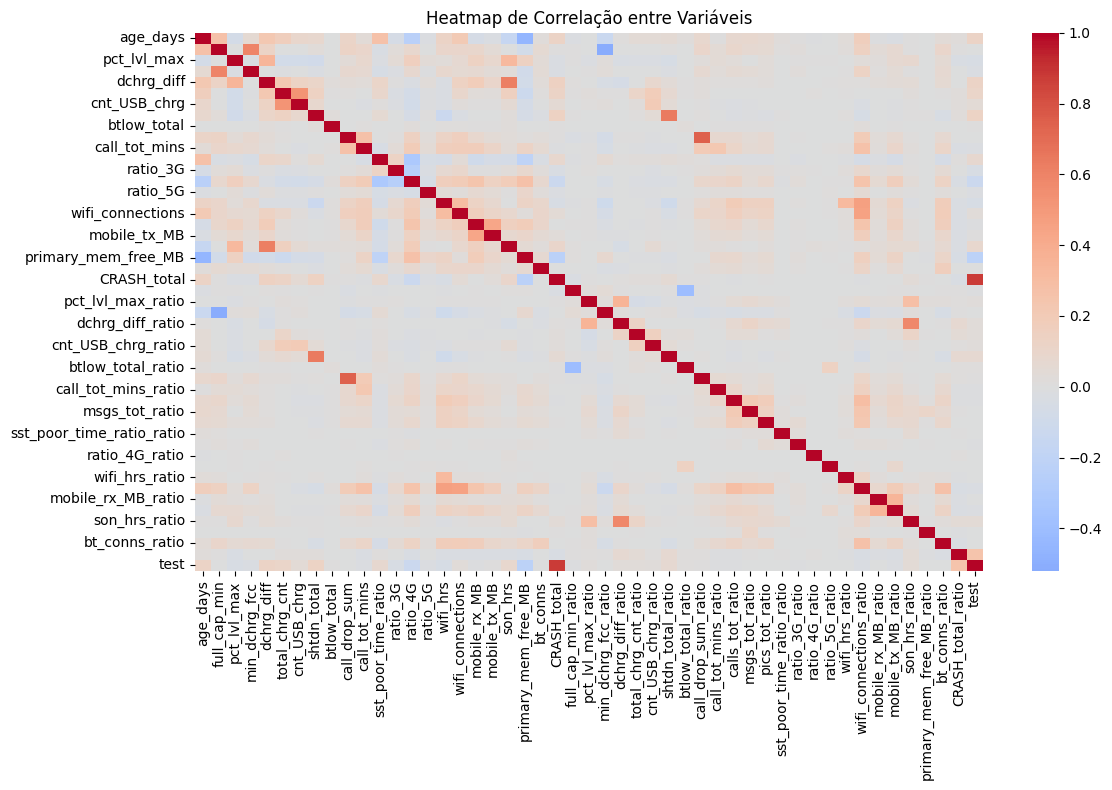

In [274]:
correlation_matrix_2 = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_2, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Heatmap de Correlação entre Variáveis')
plt.tight_layout()
plt.show()

Adotando limiar de 0.4:

In [275]:
corr_matrix = df.corr()
np.fill_diagonal(corr_matrix.values, 0)

strong_corrs = [
    (col1, col2, corr_matrix.loc[col1, col2])
    for col1 in corr_matrix.columns
    for col2 in corr_matrix.columns
    if col1 < col2 and (corr_matrix.loc[col1, col2] > 0.4 or corr_matrix.loc[col1, col2] < -0.4)
]

for col1, col2, corr_val in strong_corrs:
    print(f"{col1} ↔ {col2}: {corr_val:.2f}")

age_days ↔ primary_mem_free_MB: -0.46
full_cap_min ↔ min_dchrg_fcc: 0.60
full_cap_min ↔ min_dchrg_fcc_ratio: -0.52
dchrg_diff ↔ son_hrs: 0.62
cnt_USB_chrg ↔ total_chrg_cnt: 0.53
shtdn_total ↔ shtdn_total_ratio: 0.63
call_drop_sum ↔ call_drop_sum_ratio: 0.74
wifi_connections ↔ wifi_connections_ratio: 0.45
mobile_rx_MB ↔ mobile_tx_MB: 0.43
CRASH_total ↔ test: 0.88
dchrg_diff_ratio ↔ son_hrs_ratio: 0.58
btlow_total_ratio ↔ full_cap_min_ratio: -0.40
wifi_connections_ratio ↔ wifi_hrs: 0.46


# Análise das variáveis "dchrg_diff"




De um modo geral, a análise do quanto % da bateria foi descarregada enquanto desligado pressupõe quanto o telefone está gastando energeticamente em uma situação de não uso. De modo que esse valor estar elevado pressupõe falha, podendo ser uma análise interessante de ser realizada.

Reinicialização do dataset pós etapas de tratamento tendo as variáveis de charge como alvo. Via de regra será mantido esse padrão para cada estudo de variável alvo. Para as demais análises, embora a primeira tenha sido realizado de modo menos modular no que tange as variáveis a fim de uma primeira análise alvo mais explicativa.

Iremos nos referir como base aos dados posteriores a primeira etapa de filtro de nulos como "base".

In [214]:
df_base = pd.read_csv("Moto_HW_DATA_hashed.csv")
df_base.drop(columns=['barcode_hashed', 'EBL', 'EBL_ratio', 'calls_tot', 'msgs_tot', 'pics_tot'], inplace=True)
df_base = pd.DataFrame(SimpleImputer(strategy='median').fit_transform(df_base), columns=df_base.columns)

Verificação do comportamento individual das variáveis alvo escolhidas.

array([[<Axes: title={'center': 'dchrg_diff'}>,
        <Axes: title={'center': 'dchrg_diff_ratio'}>]], dtype=object)

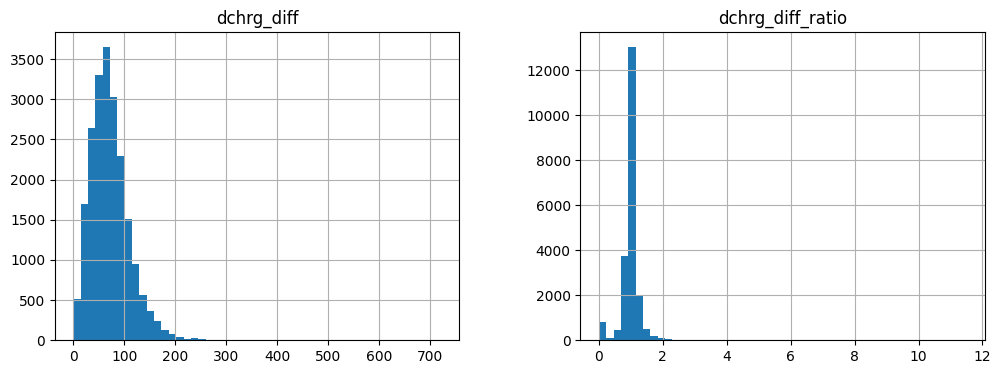

In [215]:
df_base[['dchrg_diff', 'dchrg_diff_ratio']].hist(bins=50, figsize=(12, 4))

  Nota-se uma distribuição que se aproxima de forma aproximada de uma normal para a diferença percentual. Note que não faz sentido uma redução superior a 100% da bateria, portanto essas colunas serão dropadas, bem como buscar-se-á encontrar os valores mais recorrentes para a variável ratio.

In [216]:
df_less_outliers = df_base.loc[(df_base['dchrg_diff'] < 100) & (df_base['dchrg_diff'] > 0) ]

In [217]:
df_less_outliers = df_less_outliers.loc[(df_less_outliers['dchrg_diff_ratio'] < 2) & (df_less_outliers['dchrg_diff_ratio'] > 0) ]

array([[<Axes: title={'center': 'dchrg_diff'}>,
        <Axes: title={'center': 'dchrg_diff_ratio'}>]], dtype=object)

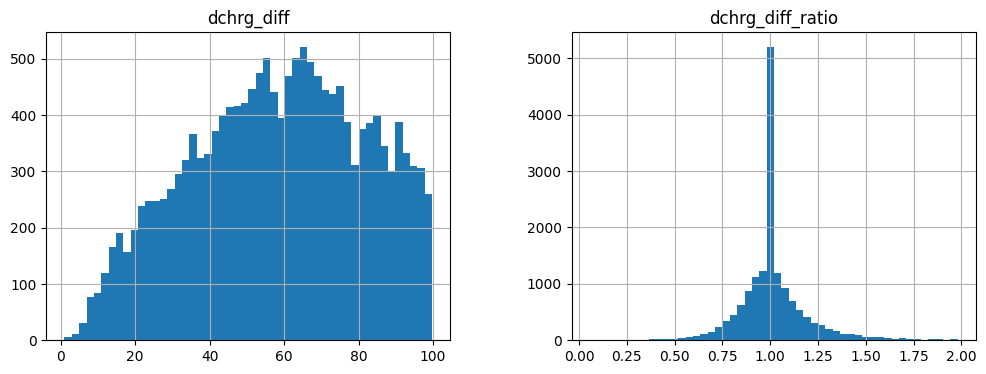

In [218]:
df_less_outliers[['dchrg_diff', 'dchrg_diff_ratio']].hist(bins=50, figsize=(12, 4))


<Axes: xlabel='dchrg_diff', ylabel='dchrg_diff_ratio'>

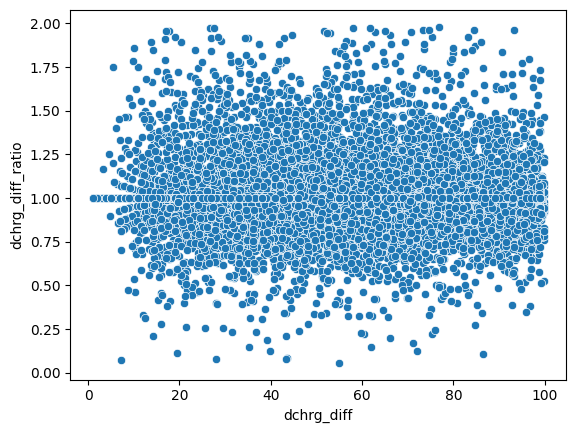

In [219]:
sns.scatterplot(x='dchrg_diff', y='dchrg_diff_ratio', data=df_less_outliers)


Conforme já revela a tendência do gráfico de ratio, houve um grande número de casos no qual esse valor foi 1, de modo que não houve variação significativa entre a variação dessa variável com o tempo, indicando que a influência da "segunda derivada" da variação da bateria com o tempo não é um parâmetro relevante. O gráfico scatter sugere que não há uma tendência funcional clara entre essas variáveis

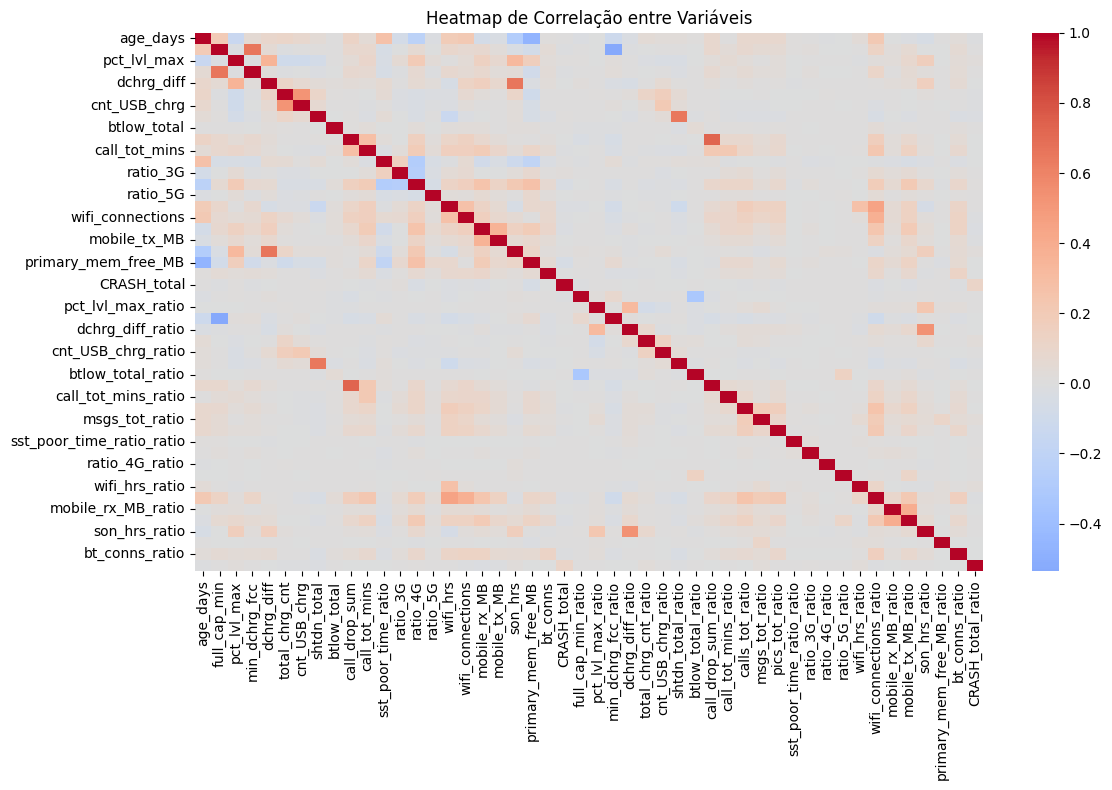

In [220]:
correlation_matrix_2 = df_less_outliers.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_2, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Heatmap de Correlação entre Variáveis')
plt.tight_layout()
plt.show()

Adotando limiar de 0.6:

In [221]:
corr_matrix = df_less_outliers.corr()
np.fill_diagonal(corr_matrix.values, 0)

strong_corrs = [
    (col1, col2, corr_matrix.loc[col1, col2])
    for col1 in corr_matrix.columns
    for col2 in corr_matrix.columns
    if col1 < col2 and (corr_matrix.loc[col1, col2] > 0.6 or corr_matrix.loc[col1, col2] < -0.6)
]

for col1, col2, corr_val in strong_corrs:
    print(f"{col1} ↔ {col2}: {corr_val:.2f}")

full_cap_min ↔ min_dchrg_fcc: 0.66
dchrg_diff ↔ son_hrs: 0.66
shtdn_total ↔ shtdn_total_ratio: 0.65
call_drop_sum ↔ call_drop_sum_ratio: 0.73


# Análise das variáveis "son_hrs"

De um modo geral, sabe-se que a maior parte da bateria de um telefone celular é consumida por sua tela (visor luminoso) e por seus dados de rede. Tendo esse conhecimento prévio sobre o elemento sobre quais foram realizadas as observações, é valioso observar essas variáveis como alvo. Devido a irregularidades como grande número de valores nulos, por exemplo, para muitos dados de rede, vamos nos debruçar com maior enfoque sobre os dados com o "screen time on"

In [222]:
df_base = pd.read_csv("Moto_HW_DATA_hashed.csv")
df_base.drop(columns=['barcode_hashed', 'EBL', 'EBL_ratio', 'calls_tot', 'msgs_tot', 'pics_tot'], inplace=True)
df_base = pd.DataFrame(SimpleImputer(strategy='median').fit_transform(df_base), columns=df_base.columns)

array([[<Axes: title={'center': 'son_hrs'}>,
        <Axes: title={'center': 'son_hrs_ratio'}>]], dtype=object)

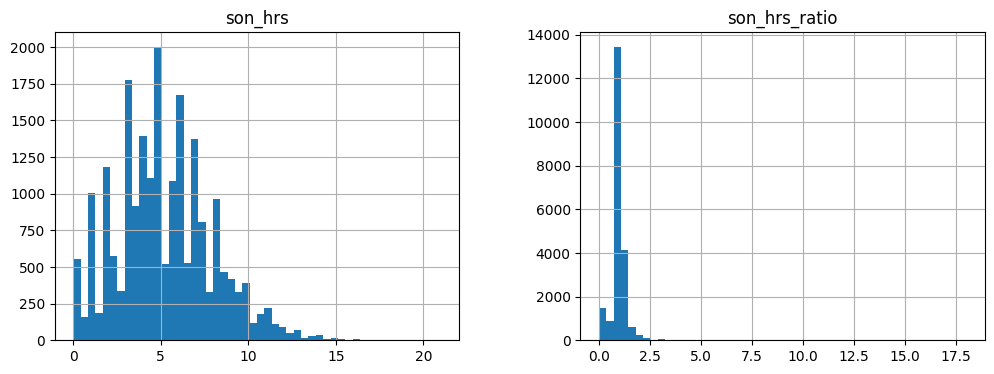

In [223]:
df_base[['son_hrs', 'son_hrs_ratio']].hist(bins=50, figsize=(12, 4))

De um modo geral novamente iremos nos concentrar sobre os valores mais ao centro da distribuição de frequências do histograma. Dito isso são realizados os filtros abaixo

In [224]:
df_less_outliers = df_base.loc[(df_base['son_hrs'] < 12) & (df_base['son_hrs'] > 0) ]

In [225]:
df_less_outliers = df_less_outliers.loc[(df_less_outliers['son_hrs_ratio'] < 2.4) & (df_less_outliers['son_hrs'] > 0) ]

array([[<Axes: title={'center': 'son_hrs'}>,
        <Axes: title={'center': 'son_hrs_ratio'}>]], dtype=object)

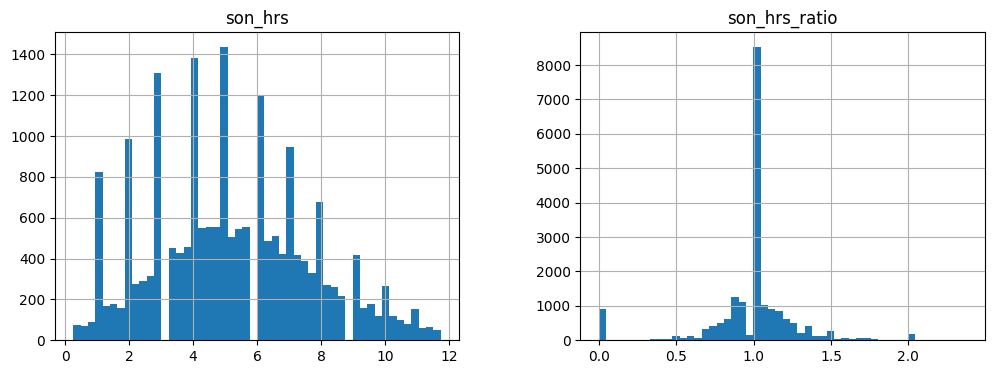

In [226]:
df_less_outliers[['son_hrs', 'son_hrs_ratio']].hist(bins=50, figsize=(12, 4))

Novamente, nota-se um grande número de casos com a variável ratio igual a 1. Essa prevalência de um único valor sugere que ela não terá grande correlação com as demais, visto que todas as análises feitas certamente dependem de diversas variáveis, o fato de essa permanecer constante enquanto as outras variam acaba por substrair correlação da variável que tem uma frequência muito grande em um valor só.

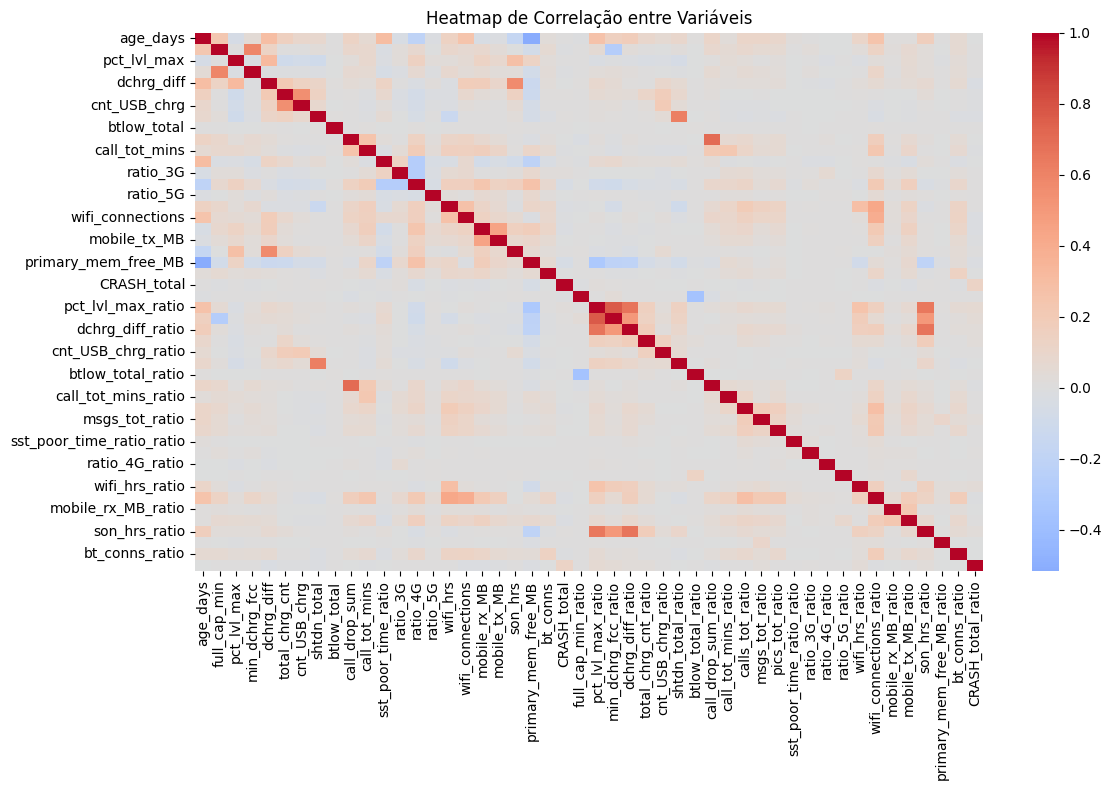

In [227]:
correlation_matrix_2 = df_less_outliers.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_2, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Heatmap de Correlação entre Variáveis')
plt.tight_layout()
plt.show()

In [228]:
corr_matrix = df_less_outliers.corr()

np.fill_diagonal(corr_matrix.values, 0)

strong_corrs = [
    (col1, col2, corr_matrix.loc[col1, col2])
    for col1 in corr_matrix.columns
    for col2 in corr_matrix.columns
    if col1 < col2 and (corr_matrix.loc[col1, col2] > 0.6 or corr_matrix.loc[col1, col2] < -0.6)
]

for col1, col2, corr_val in strong_corrs:
    print(f"{col1} ↔ {col2}: {corr_val:.2f}")

shtdn_total ↔ shtdn_total_ratio: 0.62
call_drop_sum ↔ call_drop_sum_ratio: 0.71
pct_lvl_max_ratio ↔ son_hrs_ratio: 0.65
min_dchrg_fcc_ratio ↔ pct_lvl_max_ratio: 0.77
dchrg_diff_ratio ↔ pct_lvl_max_ratio: 0.67
dchrg_diff_ratio ↔ son_hrs_ratio: 0.67


A fim de reduzir o efeito citado acima de perda de correlação em vista de alto número de uma determinada frequência, iremos buscar reduzir o valor máximo admitido de frequência para o valor da variável "son_hrs"

array([[<Axes: title={'center': 'son_hrs'}>,
        <Axes: title={'center': 'son_hrs_ratio'}>]], dtype=object)

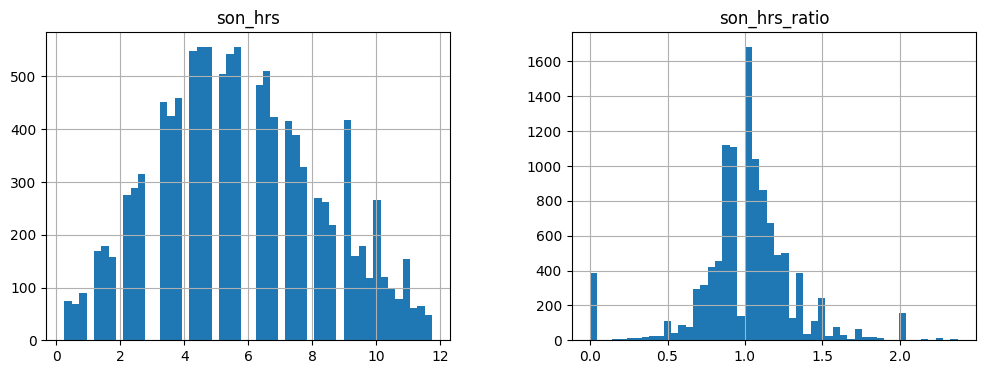

In [229]:
frequencia = df_less_outliers['son_hrs'].value_counts()
valores_excedentes = frequencia[frequencia > 600].index
df_fewer_outliers = df_less_outliers[~df_less_outliers['son_hrs'].isin(valores_excedentes)]
df_fewer_outliers[['son_hrs', 'son_hrs_ratio']].hist(bins=50, figsize=(12, 4))

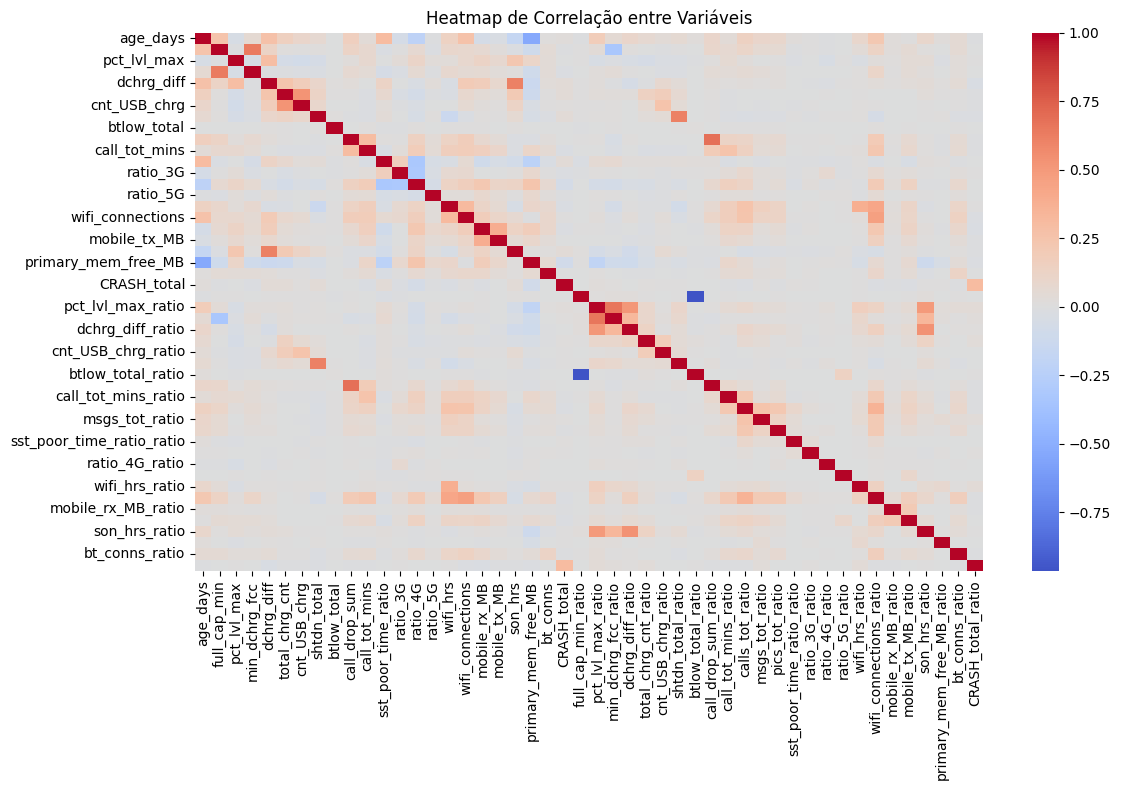

In [230]:
correlation_matrix_2 = df_fewer_outliers.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_2, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Heatmap de Correlação entre Variáveis')
plt.tight_layout()
plt.show()

In [164]:
corr_matrix = df_fewer_outliers.corr()

np.fill_diagonal(corr_matrix.values, 0)

strong_corrs = [
    (col1, col2, corr_matrix.loc[col1, col2])
    for col1 in corr_matrix.columns
    for col2 in corr_matrix.columns
    if col1 < col2 and (corr_matrix.loc[col1, col2] > 0.4 or corr_matrix.loc[col1, col2] < -0.4)
]

for col1, col2, corr_val in strong_corrs:
    print(f"{col1} ↔ {col2}: {corr_val:.2f}")



age_days ↔ primary_mem_free_MB: -0.53
full_cap_min ↔ min_dchrg_fcc: 0.63
dchrg_diff ↔ son_hrs: 0.62
cnt_USB_chrg ↔ total_chrg_cnt: 0.53
shtdn_total ↔ shtdn_total_ratio: 0.61
call_drop_sum ↔ call_drop_sum_ratio: 0.68
wifi_connections ↔ wifi_connections_ratio: 0.46
pct_lvl_max_ratio ↔ son_hrs_ratio: 0.50
min_dchrg_fcc_ratio ↔ pct_lvl_max_ratio: 0.66
dchrg_diff_ratio ↔ pct_lvl_max_ratio: 0.52
dchrg_diff_ratio ↔ son_hrs_ratio: 0.53
btlow_total_ratio ↔ full_cap_min_ratio: -0.96
wifi_connections_ratio ↔ wifi_hrs: 0.43


Nota-se que embora o valor da correlação entre as variáveis vistas mais ao centro do mapa de calor tenha sido atenuado, acabou surgindo um par com alta correlação inversa linear ao adotarmos esse filtro, "btlow_total_ratio" e "full_cap_min_ratio". Essa relação possui fundamento, uma vez que menor a capacidade máxima da batéria com o tempo (ou a sua redução), maiores serão os alertas de batéria baixa com o tempo  (ou seu aumento)

# Análise das variáveis "primary_mem_free_memory"

Seguindo a mesma lógica das anteriores, espera-se que a quantidade de memória livre no aparelho tem uma relação direta com o seu desempenho.

In [246]:
df_base = pd.read_csv("Moto_HW_DATA_hashed.csv")
df_base.drop(columns=['barcode_hashed', 'EBL', 'EBL_ratio', 'calls_tot', 'msgs_tot', 'pics_tot'], inplace=True)
df_base = pd.DataFrame(SimpleImputer(strategy='median').fit_transform(df_base), columns=df_base.columns)

array([[<Axes: title={'center': 'primary_mem_free_MB'}>,
        <Axes: title={'center': 'primary_mem_free_MB_ratio'}>]],
      dtype=object)

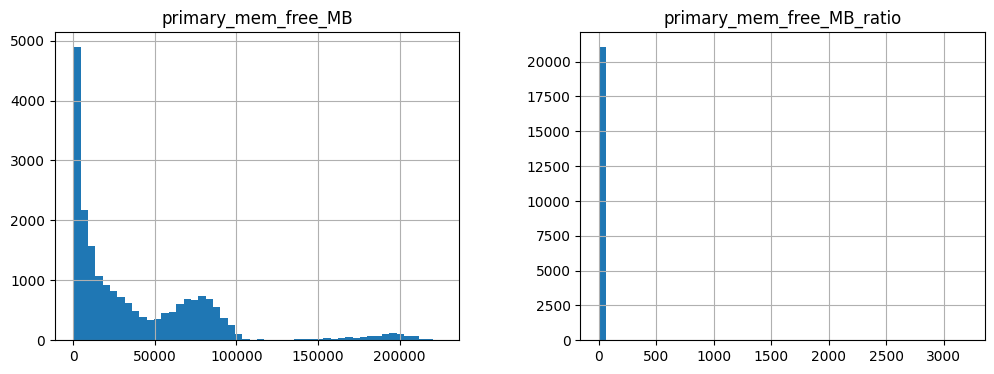

In [247]:
df_base[['primary_mem_free_MB', 'primary_mem_free_MB_ratio']].hist(bins=50, figsize=(12, 4))

array([[<Axes: title={'center': 'primary_mem_free_MB'}>,
        <Axes: title={'center': 'primary_mem_free_MB_ratio'}>]],
      dtype=object)

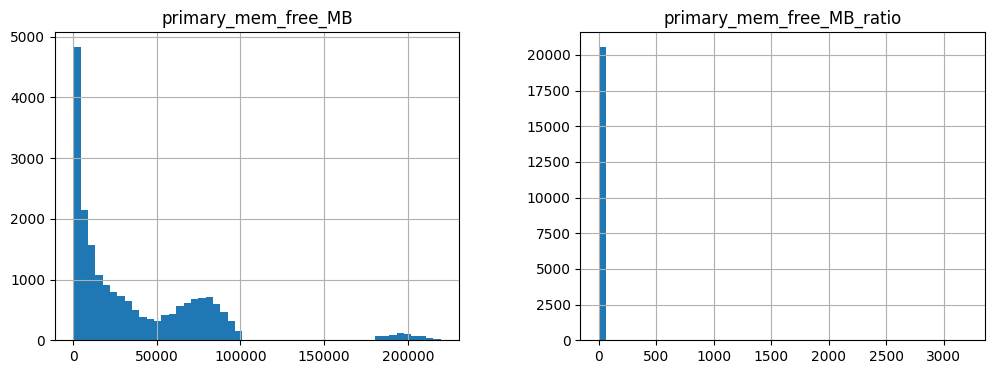

In [248]:
df_less_outliers = df_base.loc[
    (df_base['primary_mem_free_MB'] < 10**5) |
    ((df_base['primary_mem_free_MB'] > 1.8 * 10**5) & (df_base['primary_mem_free_MB'] < 2.2 * 10**5))
]

df_less_outliers[['primary_mem_free_MB', 'primary_mem_free_MB_ratio']].hist(bins=50, figsize=(12, 4))

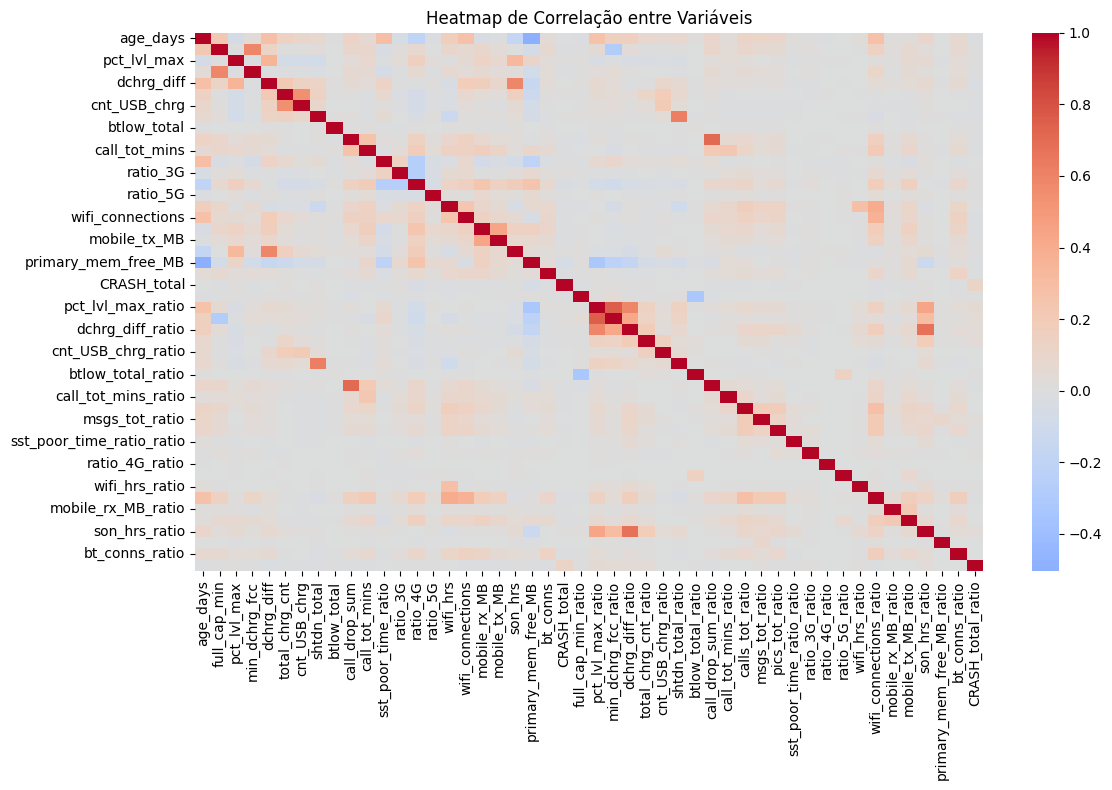

In [249]:
correlation_matrix_2 = df_less_outliers.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_2, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Heatmap de Correlação entre Variáveis')
plt.tight_layout()
plt.show()

In [250]:
corr_matrix = df_less_outliers.corr()

np.fill_diagonal(corr_matrix.values, 0)

strong_corrs = [
    (col1, col2, corr_matrix.loc[col1, col2])
    for col1 in corr_matrix.columns
    for col2 in corr_matrix.columns
    if col1 < col2 and (corr_matrix.loc[col1, col2] > 0.4 or corr_matrix.loc[col1, col2] < -0.4)
]

for col1, col2, corr_val in strong_corrs:
    print(f"{col1} ↔ {col2}: {corr_val:.2f}")

age_days ↔ primary_mem_free_MB: -0.50
full_cap_min ↔ min_dchrg_fcc: 0.59
dchrg_diff ↔ son_hrs: 0.59
cnt_USB_chrg ↔ total_chrg_cnt: 0.55
shtdn_total ↔ shtdn_total_ratio: 0.62
call_drop_sum ↔ call_drop_sum_ratio: 0.71
mobile_rx_MB ↔ mobile_tx_MB: 0.44
pct_lvl_max_ratio ↔ son_hrs_ratio: 0.44
min_dchrg_fcc_ratio ↔ pct_lvl_max_ratio: 0.75
dchrg_diff_ratio ↔ pct_lvl_max_ratio: 0.59
dchrg_diff_ratio ↔ min_dchrg_fcc_ratio: 0.42
dchrg_diff_ratio ↔ son_hrs_ratio: 0.67
wifi_connections_ratio ↔ wifi_hrs: 0.40


array([[<Axes: title={'center': 'primary_mem_free_MB'}>,
        <Axes: title={'center': 'primary_mem_free_MB_ratio'}>]],
      dtype=object)

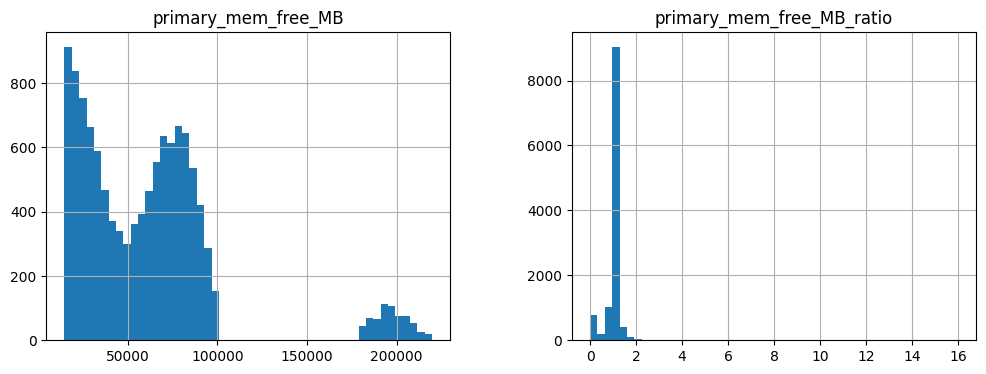

In [251]:
df_fewer_outliers = df_less_outliers.loc[df_less_outliers['primary_mem_free_MB'] > 11**4]
df_fewer_outliers[['primary_mem_free_MB', 'primary_mem_free_MB_ratio']].hist(bins=50, figsize=(12, 4))

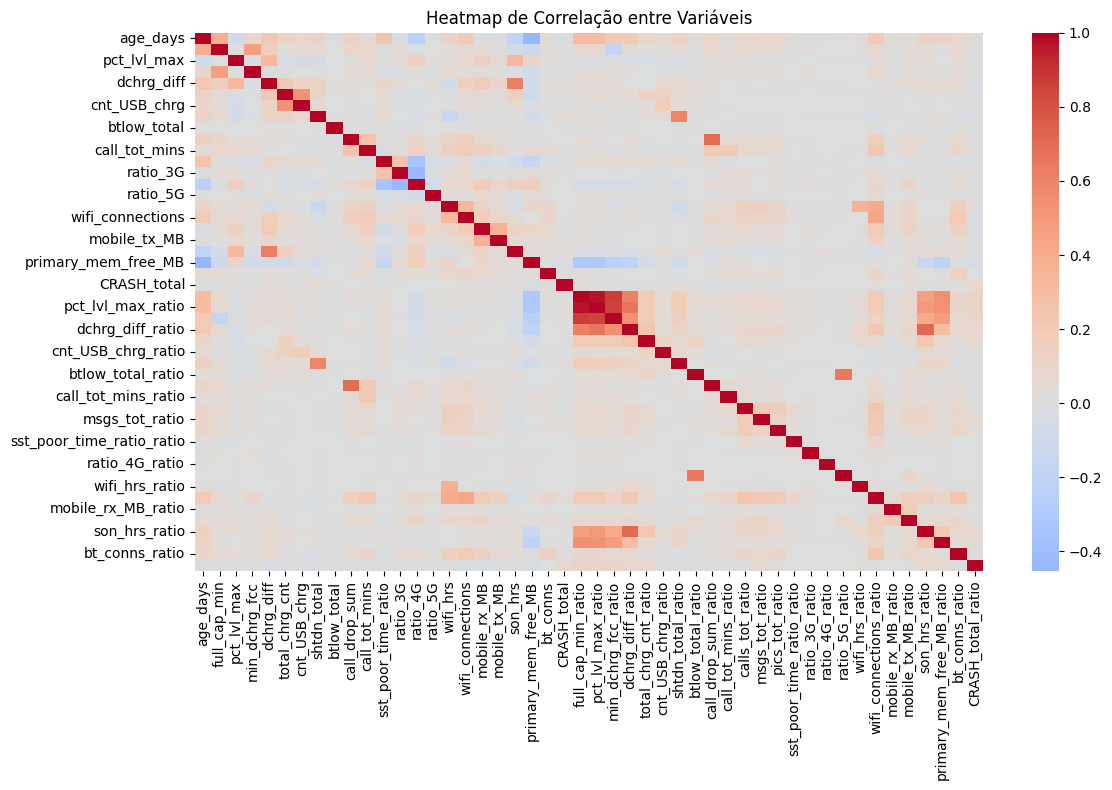

In [252]:
correlation_matrix_2 = df_fewer_outliers.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_2, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Heatmap de Correlação entre Variáveis')
plt.tight_layout()
plt.show()

In [210]:
corr_matrix = df_fewer_outliers.corr()

np.fill_diagonal(corr_matrix.values, 0)

strong_corrs = [
    (col1, col2, corr_matrix.loc[col1, col2])
    for col1 in corr_matrix.columns
    for col2 in corr_matrix.columns
    if col1 < col2 and (corr_matrix.loc[col1, col2] > 0.4 or corr_matrix.loc[col1, col2] < -0.4)
]

for col1, col2, corr_val in strong_corrs:
    print(f"{col1} ↔ {col2}: {corr_val:.2f}")

age_days ↔ primary_mem_free_MB: -0.45
full_cap_min ↔ min_dchrg_fcc: 0.48
dchrg_diff ↔ son_hrs: 0.62
cnt_USB_chrg ↔ total_chrg_cnt: 0.54
shtdn_total ↔ shtdn_total_ratio: 0.60
call_drop_sum ↔ call_drop_sum_ratio: 0.70
ratio_3G ↔ ratio_4G: -0.43
wifi_connections ↔ wifi_connections_ratio: 0.43
full_cap_min_ratio ↔ pct_lvl_max_ratio: 0.97
full_cap_min_ratio ↔ min_dchrg_fcc_ratio: 0.87
full_cap_min_ratio ↔ son_hrs_ratio: 0.46
full_cap_min_ratio ↔ primary_mem_free_MB_ratio: 0.55
pct_lvl_max_ratio ↔ son_hrs_ratio: 0.50
pct_lvl_max_ratio ↔ primary_mem_free_MB_ratio: 0.53
min_dchrg_fcc_ratio ↔ pct_lvl_max_ratio: 0.86
min_dchrg_fcc_ratio ↔ son_hrs_ratio: 0.41
min_dchrg_fcc_ratio ↔ primary_mem_free_MB_ratio: 0.48
dchrg_diff_ratio ↔ full_cap_min_ratio: 0.61
dchrg_diff_ratio ↔ pct_lvl_max_ratio: 0.66
dchrg_diff_ratio ↔ min_dchrg_fcc_ratio: 0.55
dchrg_diff_ratio ↔ son_hrs_ratio: 0.71
btlow_total_ratio ↔ ratio_5G_ratio: 0.65
wifi_connections_ratio ↔ wifi_hrs: 0.41


# Definição dos Objetivos e Método

Baseado na análise exploratória realizada, percebeu-se de um modo geral uma tendência forte de conexão de dados relacionados a bateria diretamente ou a que ela podem influenciar (como horas de tela ligada e quantidade de memória livre).

Dito isso, o objetivo do projeto será determinar o nível percentual máximo da carga da bateria (pct_lvl_max) tendo em vista outros diversos parâmetros relacionados a bateria e parâmetros que podem interferir drasticamente em seu valor. Nesse sentido, esse dado gera valor para o usuário na medida que informa se a bateria está no período de ser trocada ou não.

Sendo assim, embora nem todos os valores de correlação tenham apresentado valor elevado, percebeu-se que alguns deles apresentaram relação considerável no que tange a bateria. Desse modo, a fim de atingir o objetivo, irá se adotar um método de regressão a fim de descobrir a partir dos dados uma relação dentre as variáveis que possam prever com o máximo de acurácia o valor da vida útil da bateria do aparelho. Para isso, serão analisadas somente as variáveis

son_hrs
son_hrs_ratio
dcharg_diff
dcharg_diff_ratio
full_cap_min
full_cap_min_ratio
btlow_total_ratio
btlow_total
primary_mem_free_memory
cnt_USB_charges
cnt_USB_charges_ratio